<a href="https://colab.research.google.com/github/KendallScott/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#Import the Libraries
from scipy.io import arff
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from numpy import random
from itertools import product
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import xgboost as xgb
from xgboost import DMatrix
from sklearn.preprocessing import OneHotEncoder


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.DataFrame()
i=1
x=str(i)
while i <6:
  data = arff.loadarff('/content/drive/MyDrive/Case_Study_4_Data/'+x+'year.arff')
  df_alt = pd.DataFrame(data[0])
  df = pd.concat([df,df_alt],ignore_index=True)
  i+=1
  x=str(i)

df


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [21]:
for i in df.columns:
  if df[i].isnull().sum() > len(df)*.05:
    print('{} contains {} NAs'.format(i,df[i].isnull().sum()))

Attr21 contains 5854 NAs
Attr27 contains 2764 NAs
Attr37 contains 18984 NAs


In [22]:
df.drop(['Attr27','Attr37'],inplace=True,axis=1)
x = [n for n in list(range(1,65)) if n not in [27,37]]

for i in x:
  df['Attr'+str(i)] = df[['Attr'+str(i),'class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22

In [ ]:
import re

#binary logistic
# roc AUC scores
#precision
#recall
#accuracy
#90s (AUC)
#XGBoost and Random forest

#change where you round at for increases in  precision

In [24]:
df['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [25]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].str.replace(r'[b]*', '')
df['class'] = df['class'].str.replace(r'[\']*', '')
df['class'] = df['class'].astype('category')

<ipython-input-25-45738530801f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[b]*', '')
<ipython-input-25-45738530801f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[\']*', '')


In [26]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [27]:
#scaling
cols = df.columns
num_cols = df._get_numeric_data().columns

#creating dataframe of numeric columns
scaler = StandardScaler()
num_df = scaler.fit_transform(df[num_cols])

#creating dataframe of categorical columns
cat_df = pd.DataFrame(df['class'])

df=cat_df.join(pd.DataFrame(num_df,columns=df[num_cols].columns, index=df[num_cols].index))
df

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0,0.055246,-0.036047,0.051849,-0.014412,0.006814,0.061710,0.027362,-0.022332,-0.024040,...,4.868105,0.004936,0.029817,-0.005459,-0.010903,-0.013238,-0.021463,-0.010177,-0.039508,-0.027268
1,0,0.058109,-0.015443,0.065793,-0.014760,0.006527,0.007791,0.028864,-0.022994,-0.015129,...,-0.076621,0.004936,0.031488,-0.005463,-0.010918,-0.013374,-0.024837,-0.010000,-0.047701,-0.004448
2,0,0.071316,0.018113,0.028079,-0.016082,0.006267,0.007791,0.037743,-0.024100,-0.021337,...,-0.019119,0.004959,0.060576,-0.005480,-0.005227,-0.013347,-0.023610,-0.009806,-0.053198,-0.028214
3,0,0.015475,-0.048400,0.063318,-0.012902,0.007135,0.028606,-0.000131,-0.021272,-0.025340,...,0.183765,0.004924,0.011159,-0.005446,-0.010918,-0.013360,-0.024219,-0.010150,-0.041065,-0.028068
4,0,0.050827,0.003959,0.021179,-0.016585,0.006166,0.033805,0.016432,-0.023716,-0.023770,...,-0.064030,0.004939,0.036190,-0.005461,-0.009899,-0.013302,-0.022950,-0.009857,-0.051982,-0.027067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,1,-0.007434,0.019874,-0.013891,-0.017379,0.005977,0.007791,-0.013912,-0.024141,-0.015492,...,-0.058142,0.004917,0.003980,-0.005433,-0.000603,-0.013078,-0.008257,-0.010419,-0.015187,-0.029461
43401,1,-0.204824,0.064517,-0.168281,-0.020791,0.005185,-0.072488,-0.117550,-0.025763,-0.027204,...,-0.241453,0.004901,0.109159,-0.005424,-0.011067,-0.009994,0.050265,-0.010188,-0.038877,-0.028247
43402,1,-0.071549,0.113862,-0.071780,-0.018825,0.004317,-0.017075,-0.043481,-0.025479,-0.023468,...,-0.941094,0.004942,0.040866,-0.005464,-0.015197,-0.013193,-0.024446,-0.009277,-0.060962,-0.026192
43403,1,-0.048104,0.026332,-0.018195,-0.017665,0.006008,-0.007328,-0.035472,-0.024717,-0.028708,...,-0.093710,0.004879,-0.084634,-0.005401,0.038981,-0.013065,-0.019762,-0.010174,-0.039707,-0.030025


In [28]:
# Make target variable and data variable
y = df[['class']].astype(int).values.flatten()
X = df.loc[:, df.columns != 'class']

In [31]:
#takes about 30 mins on my pc
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=624,n_jobs=-1,n_estimators=50,criterion='entropy', class_weight='balanced')

#log 2 is 6, sqrt is 8, will try a couple more values as well as none
params = {'min_samples_split':[2,4,8],'min_samples_leaf':[1,2,3],'max_features':['sqrt',7,10,'log2',None]}
grid = GridSearchCV(rf, param_grid=params,cv = 5, scoring = 'roc_auc')
results = grid.fit(X,y)

print(results.best_estimator_)
print(results.best_score_)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50, n_jobs=-1,
                       random_state=624)
0.9119877909903078


random forest grid search returns the following best_score_ = 0.9107838212790099
best_params_ max_features = None, min_samples_leaf = 3, min_samples_split = 8

In [32]:
## fit model with best params
rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=results.best_params_.get('max_features'), min_samples_leaf=results.best_params_.get('min_samples_leaf'), min_samples_split=results.best_params_.get('min_samples_split'),class_weight='balanced')
#rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=None, min_samples_leaf=3, min_samples_split=8)

cv_results = cross_validate(rf,X,y,scoring = ['roc_auc','accuracy','precision','recall'])

In [33]:
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall
0,1106.365004,1.309512,0.921768,0.959912,0.807018,0.220096
1,1072.017745,1.871433,0.896419,0.956226,0.625000,0.227273
2,1079.323383,1.395359,0.923065,0.961064,0.781690,0.265550
3,1110.025354,1.365877,0.938851,0.958069,0.704545,0.222488
4,1086.368200,1.332543,0.949959,0.961756,0.891892,0.236277


results from cross_val_score = {'fit_time': array([814.58124352, 800.96749759, 797.51462173, 820.0529983 ,
       806.91520572]), 'score_time': array([1.18171811, 0.70064592, 0.71089339, 0.70277381, 0.70549774]), 'test_roc_auc': array([0.91693544, 0.89812588, 0.9234541 , 0.93619189, 0.94596678]), 'test_accuracy': array([0.96025803, 0.95991245, 0.96152517, 0.9609492 , 0.96221633]), 'test_precision': array([0.91954023, 0.85714286, 0.875     , 0.88349515, 0.95959596]), 'test_recall': array([0.19138756, 0.20095694, 0.23444976, 0.21770335, 0.22673031])}


In [35]:
dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)
#dtest = xgb.DMatrix(X_test, label=y_test) #will use all the data for cross validation

In [36]:
## this is an exhaustive search like gridsearchCV (we could switch to picking a random set of 15 ish)
#xgb cv uses a seed of 0, so should be reproducible
def search(search_dict,X,y):
  ret = {} #results dictionary
  idx = 0 #results counter
  prods = list(product(*search_dict.values()))
  dtrain = xgb.DMatrix(X,label=y)
  for i in prods:
    a_dict = dict(zip(search_dict.keys(),i)) #this will be the hyperparams used in function call
    out = xgb.cv(params=a_dict, num_boost_round=200, dtrain=dtrain,nfold=5,stratified=True,early_stopping_rounds=5)
    index=out.shape[0]-1
    loss_results=out.iloc[index,:]
    ret.update({idx:{'params':a_dict,'loss':loss_results.to_dict(),'length':out.shape[0]}})
    idx +=1
  return(ret)

In [ ]:
hyper_dict = {'objective':['binary:logistic'],
              'eval_metric':['auc'],
              'eta':[0.1],
              'max_depth':[4,5,6,7],
              'gamma':[0,1,3],
              'lambda':[1,2,3],
              'alpha':[0,0.1,1]}
search_res = search(hyper_dict, X,y)

In [ ]:
best_params = {}
best_score = 0
for i in search_res:
  if search_res.get(i).get('loss').get('test-auc-mean') > best_score: #larger score is better? like in sklearn, it's got to be, right?
    best_score = search_res.get(i).get('loss').get('test-auc-mean')
    best_params.update({'best_params':search_res.get(i).get('params')})
print(best_score)
print(best_params)

In [37]:
#setting up a hyperparameter dataframe

learning_rates = [0.1, 0.25]
max_depths = [3, 5, 10, 20]
gamma = [0,1,3]
lambda_ls = [1,2,3]
alpha = [0,0.1,1]


param_df = pd.DataFrame(list(product(learning_rates, max_depths, gamma, lambda_ls, alpha)), columns=['learning_rate', 'max_depth', 'gamma', 'lambda', 'alpha'])

#randomizing the dataframe order
param_df = shuffle(param_df)
param_df = param_df.reset_index()
param_df=param_df.drop(['index'], axis=1)
param_df

,learning_rate,max_depth,gamma,lambda,alpha
0,0.25,5,3,2,1.0
1,0.10,20,1,2,1.0
2,0.25,20,3,3,0.0
3,0.10,5,0,3,1.0
4,0.25,3,1,3,1.0
...,...,...,...,...,...
211,0.25,5,1,1,1.0
212,0.25,3,1,3,0.1
213,0.25,20,1,3,0.0
214,0.10,10,1,3,1.0


In [ ]:
trials = 20
best_params = {}
i=0

for i in range(trials):
  #random sampling from paramdf


  hyperparams = {'objective': 'binary:logistic',
                 'eta': param_df['learning_rate'][i],
                 'max_depth': param_df['max_depth'][i],
                 'gamma': param_df['gamma'][i],
                 'lambda': param_df['lambda'][i],
                 'alpha': param_df['alpha'][i]
                 }



  print(hyperparams)
  out=xgb.cv(params=hyperparams,  num_boost_round=200, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)
  index=out.shape[0]-1
  result=out.iloc[index,2]
  if i< 1:
    best_result = result
    best_params = hyperparams

  if result< best_result:
      best_result = result
      best_params = hyperparams
      print('result: ' ,result)
      print('best result: ' ,best_result)
      print('hyperparameters: ' ,hyperparams)
      print('best hyperparameters: ' ,best_params)

      i+=1


{'objective': 'binary:logistic', 'eta': 0.25, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 1.0}
[0]	train-logloss:0.50775+0.00020	test-logloss:0.50859+0.00025
[1]	train-logloss:0.39557+0.00035	test-logloss:0.39730+0.00063
[2]	train-logloss:0.32082+0.00068	test-logloss:0.32356+0.00106
[3]	train-logloss:0.26915+0.00035	test-logloss:0.27274+0.00112
[4]	train-logloss:0.23249+0.00031	test-logloss:0.23678+0.00106
[5]	train-logloss:0.20556+0.00051	test-logloss:0.21037+0.00147
[6]	train-logloss:0.18636+0.00069	test-logloss:0.19199+0.00174
[7]	train-logloss:0.17176+0.00052	test-logloss:0.17828+0.00192
[8]	train-logloss:0.16102+0.00074	test-logloss:0.16844+0.00189
[9]	train-logloss:0.15262+0.00077	test-logloss:0.16090+0.00182
[10]	train-logloss:0.14587+0.00100	test-logloss:0.15510+0.00174
[11]	train-logloss:0.14013+0.00067	test-logloss:0.15016+0.00239
[12]	train-logloss:0.13541+0.00079	test-logloss:0.14642+0.00281
[13]	train-logloss:0.13167+0.00072	test-logloss:0.14365+0.00292
[14]	train-lo

In [ ]:
best_params

In [ ]:
hyperparams = { 'eta':0.5,
                'max_depth': 5,
                'objective': 'binary:logistic'}

XGBModel = xgb.XGBClassifier(params=hyperparams, num_boost_round=50, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)

In [ ]:
# will have to be refit with tuned parameters, but this works
# returns results in dictionary with test set, predicted probabilities, and binary class
# binary class could be removed to be used outside the function with the probabilities
skf = StratifiedKFold(n_splits=5,random_state=624,shuffle=True)

preds_xgb = dict()
for i, (train,test) in enumerate(skf.split(X,y)):
    dtrain = xgb.DMatrix(X.loc[train,:],y[train])
    dtest = xgb.DMatrix(X.loc[test,:],y[test])
    xgb_model = xgb.train(params={'objective':'binary:logistic','max_depth':10,'eta':0.1},num_boost_round=3,dtrain=dtrain)
    pred = xgb_model.predict(dtest)
    binary_pred = []
    for j in pred:
        if j > 0.5:
            binary_pred.append(1)
        else:
            binary_pred.append(0)
    preds_xgb.update({i:{'y_test':y[test],'preds_proba':pred,'preds_binary':np.array(binary_pred)}})

NameError: ignored

In [ ]:
out

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.450124,0.000357,0.452195,0.000630
1,0.314638,0.000541,0.318561,0.001051
2,0.229106,0.000762,0.234403,0.001444
3,0.171727,0.001076,0.178485,0.001965
4,0.131634,0.000962,0.140218,0.002320
5,0.103055,0.001328,0.113195,0.002348
6,0.082302,0.001140,0.093999,0.002971
7,0.066170,0.000694,0.079625,0.003395
8,0.054074,0.000984,0.069482,0.003335
9,0.044830,0.000920,0.062058,0.003344


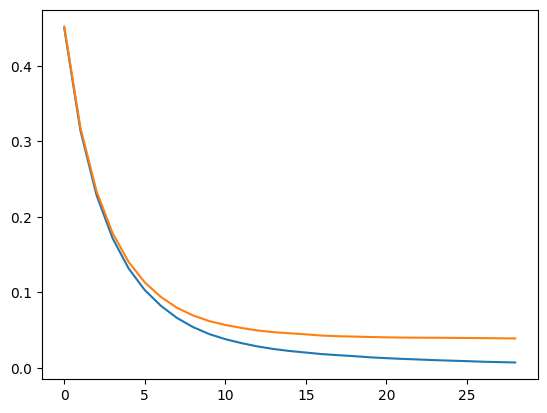

In [ ]:
import matplotlib.pyplot as plt

#needs to run longer to see differences in the lines?
plt.plot(out['train-logloss-mean'])
plt.plot(out['test-logloss-mean'])
plt.show()